* INTRODUCTION

In [1]:
users = [
    {'id': 0, 'name': 'Hero'},
    {'id': 1, 'name': 'Dunn'},
    {'id': 2, 'name': 'Sue'},
    {'id': 3, 'name': 'Chi'},
    {'id': 4, 'name': 'Thor'},
    {'id': 5, 'name': 'Clive'},
    {'id': 6, 'name': 'Hicks'},
    {'id': 7, 'name': 'Devin'},
    {'id': 8, 'name': 'Kate'},
    {'id': 9, 'name': 'Klein'}
]

friendships = [(0,1), (0,2), (1,2), (1,3), (2,3), (3,4), (4,5), (5,6), (5,7), (6,8), (7,8), (8,9)]

In [2]:
for user in users:
    user['friends'] = []

for i, j in friendships:
    users[i]['friends'].append(users[j])
    users[j]['friends'].append(users[i])

In [3]:
def number_of_friends(user):
    return len(user['friends'])

total_connections = sum(number_of_friends(user) for user in users)
print(f'El número {total_connections} es el numero total de conexiones.')

El número 24 es el numero total de conexiones.


In [4]:
from __future__ import division

num_users = len(users)
avg_connections = total_connections/num_users
print(avg_connections)

num_friends_by_id = [(user['id'], number_of_friends(user))
                     for user in users]
sorted(num_friends_by_id,
       key= lambda num_friends_by_id:num_friends_by_id[1], 
       reverse=True)

2.4


[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1)]

In [5]:
#amigos de amigos
def friends_of_friend_ids_bad(user):
    #foaf is short for 'friends of a friend'
    return[(foaf['id'], foaf['name'])
           for friend in user['friends']
           for foaf in friend['friends']]
print(friends_of_friend_ids_bad(users[0]))

[(0, 'Hero'), (2, 'Sue'), (3, 'Chi'), (0, 'Hero'), (1, 'Dunn'), (3, 'Chi')]


El código no funciona correctamente, porque salen valores repetidos.
Vamos a hacerlo bien:

In [6]:
from collections import Counter

def not_the_same(user, other_user):
    return user['id'] != other_user['id']

def not_friends(user, other_user):
    not_friends = True
    for friend in user['friends']:
        if friend['id'] == other_user['id']:
            not_friends = False
            break
    return not_friends

def friends_of_friend_ids(user):
    l = []
    for friend in user['friends']:
        for foaf in friend['friends']:
            if not_the_same(user, foaf) and not_friends(user, foaf):
                l.append(foaf['id'])
    return Counter(l)

print(friends_of_friend_ids(users[3]))

Counter({0: 2, 5: 1})


Esto nos indica que el usuario 3 tiene 2 amigos de amigos, pero con una conexión más con el 0.
Dicho de otra forma, el usuario 3 tiene 2 amigos comunes con el 0, y uno con el 5.

In [7]:
interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
    ]

In [8]:
def data_scientists_who_like(target_interest):
    lista = []
    for user_id, user_interest in interests:
        if user_interest == target_interest:
            lista.append(user_id)
    return lista

El algoritmo anterior funciona pero no es óptimo

In [9]:
from collections import defaultdict

#keys are interests, values are lists of user_ids with that interest
user_ids_by_interest = defaultdict(list)
for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)

#keys are user_ids, values are lists of interests for that user_id
interests_by_user_id = defaultdict(list)
for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)
    
def most_common_interests_with(user):
    l = []
    for interest in interests_by_user_id[user['id']]:
        for interested_user_id in user_ids_by_interest[interest]:
            if interested_user_id != user['id']:
                l.append(interested_user_id)
    return Counter(l)

most_common_interests_with(users[0])


Counter({9: 3, 8: 1, 1: 2, 5: 1})

Ahora vamos a contar (de una forma no óptima) el numero de intereses que hay de cada uno.

In [10]:
l = []
for user, interest in interests:
    for word in interest.lower().split():
        l.append(word)

for word, count in Counter(l).most_common():
    if count > 1:
        print (word, count)

big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
neural 2
networks 2


Esto significa que el usuario 0 tiene 3 hobbies en común con el 9, 1 con el 8, 2 con el 1, y1 con el 5.

In [11]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]

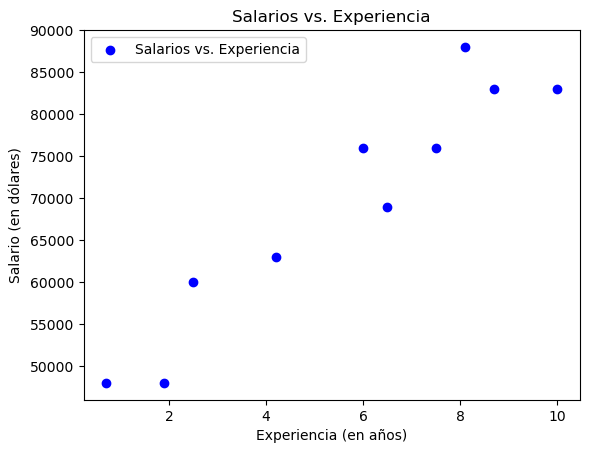

In [12]:
import matplotlib.pyplot as plt

# Separar los datos en listas separadas para x (salarios) e y (tenures)
salaries, tenures = zip(*salaries_and_tenures)

# Crear el scatter plot
plt.scatter(tenures, salaries, label='Salarios vs. Experiencia', color='blue', marker='o')

# Personalizar el gráfico
plt.title('Salarios vs. Experiencia')
plt.xlabel('Experiencia (en años)')
plt.ylabel('Salario (en dólares)')
plt.legend()

# Mostrar el gráfico
plt.show()


In [13]:
#las llaves son los años, y los valores de los salarios
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)

average_salary_by_tenure = {
    tenure: sum(salaries)/len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}

print(average_salary_by_tenure)

{8.7: 83000.0, 8.1: 88000.0, 0.7: 48000.0, 6: 76000.0, 6.5: 69000.0, 7.5: 76000.0, 2.5: 60000.0, 10: 83000.0, 1.9: 48000.0, 4.2: 63000.0}


No tiene mucho sentido, ya que cada usuario tiene una cantidad de experiencia diferente.
Nos puede ayudar, si agrupamos algunos valores de años de experiencia.

In [14]:
def tenure_bucket(tenure):
    if tenure < 2:
        return 'less than two'
    elif tenure < 5:
        return 'between two and five'
    else:
        return 'more than five'

salary_by_tenure_bucket = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)

average_salary_by_tenure_bucket = {
    bucket : sum(salaries)/len(salaries)
    for bucket, salaries  in salary_by_tenure_bucket.items()
}

print(average_salary_by_tenure_bucket)

{'more than five': 79166.66666666667, 'less than two': 48000.0, 'between two and five': 61500.0}


* A CRASH COURSE IN PYTHON

Queremos crea nuestra propia clase 'CONJUNTO'.

In [15]:
class Set:
    
    def __init__(self, values=None):
        self.dict = {}
        if values is not None:
            for value in values:
                self.add(value)
    
    def __repr__(self):
        return 'Set: ' + str(self.dict.keys())
    
    def add(self, value):
        self.dict[value] = True
    
    def contains(self, value):
        return value in self.dict
    
    def remove(self, value):
        del self.dict[value]

s = Set([1,2,3])
s.add(4)
print(s.contains(4))
s.remove(2)
print(s)

True
Set: dict_keys([1, 3, 4])


In [16]:
def doubler(f):
    def g(*args, **kwargs):
        return 2 * f(*args, **kwargs)
    return g

def f(x,y):
    return x + y

g = doubler(f)
print(g(1,2))

6
